# **Creazione della griglia per il modello WHETGEO1D**
## **Perissini 218299**
## **Finotti 217936**

In [4]:
import os
import pandas as pd

from geoframepy.whetgeo1d import grid_creator
from geoframepy.whetgeo1d import grid_to_netcdf
from WHETGEO1D_GridCreator import*
from WHETGEO1D_toNetCDF import*

import warnings
warnings.filterwarnings('ignore')
####### Plot settings #######
nice_fonts = {
        "legend.frameon": True,

        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.3,
        # Use LaTeX to write all text
        "text.usetex": False,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
       "axes.labelsize": 16,
        "font.size": 16,
        # Make the legend/label fonts a little smaller
       "legend.fontsize": 12,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
}
plt.rcParams.update(nice_fonts)

project_path = os.path.dirname(os.getcwd())

# Input

In [5]:
# tipo geometria
grid_input_file_name = project_path + "/data/Grid_input/ex01_grid_esercitazione_perissini.csv"
#condizioni iniziali
ic_input_file_name = project_path + "/data/Grid_input/ex01_ic_esercitazione_perissini.csv"
# file parametri SWRC
parameter_input_file_name = project_path + "/data/Grid_input/Richards_VG.csv"
dictionary_input_file_name = project_path + "/data/Grid_input/dictionary.csv"
#tipo di griglia:
#classical: suddividere ogni layer con numero di volumi di controllo a scelta con stessa dimensione
#esponential: numero di volumi di controllo maggiore in superficie, diminmuiscono verso il fondo
#mixed: misto tra esponenziale e classica, numerod ivolumi di controllo maggiore nelle interfacce tra diversi layer
grid_type = 'classical'
dz_min = 0.01
dz_max = 0.05
b = 0.5
# metodo per interpolare la psi
psi_interp_model = "linear"
# metodo di interpolazione per temperatura
T_interp_model = "linear"
water_ponding_0 = 0.2
# temperatura
T_water_ponding_0 = 293.15
output_file_name =  project_path + "/data/Grid_NetCDF/ex01_grid_perissini.nc"

output_title = '''
'''
output_summary = '''
'''
output_date = ''

output_institution = 'GEOframe'

## Run modello WHETGEO

In [6]:
data_grid = pd.read_csv(grid_input_file_name)
print('Grid')
print(data_grid)
print()

data_ic = pd.read_csv(ic_input_file_name)
print('IC')
print(data_ic)
print()

data_parameter = pd.read_csv(parameter_input_file_name, comment='#')
print('Parameter')
print(data_parameter)
print()

data_dictionary = pd.read_csv(dictionary_input_file_name)

[KMAX, eta, eta_dual, space_delta, z, z_dual, control_volume] = grid_creator.grid1D(data_grid, dz_min, b, dz_max, grid_type, shallow_water=True)

[psi_0, T_0] = grid_creator.set_initial_condition(data_ic, eta, psi_interp_model, T_interp_model, water_ponding_0=water_ponding_0, T_water_ponding_0=T_water_ponding_0, shallow_water=True)

control_volume_index = grid_creator.calibration_point_index(data_grid, eta)

[equation_state_ID, parameter_ID, theta_s, theta_r, par_1, par_2, par_3, par_4,
par_5, alpha_ss, beta_ss, ks] = grid_creator.set_parameters_richards(data_grid, data_parameter, data_dictionary, KMAX, eta)

grid_to_netcdf.write_grid_netCDF_richards(eta, eta_dual, z, z_dual, space_delta, control_volume, control_volume_index, psi_0, T_0, equation_state_ID, parameter_ID, KMAX,
                  theta_s, theta_r, par_1, par_2, par_3, par_4, par_5, alpha_ss, beta_ss, ks,
                  output_file_name, output_title, output_institution, output_summary, output_date, grid_input_file_name, parameter_input_file_name)

Grid
  Type   eta   K  equationStateID  parameterID
0    L  0.00   7              1.0          4.0
1    L -0.07  18              1.0          3.0
2    L -0.25  20              1.0          2.0
3    L -0.45  35              1.0          7.0
4    L -0.80  70              1.0          9.0
5    L -1.50   0              NaN          NaN

IC
   eta  Psi0      T0
0 -0.0   0.2  293.15
1 -1.5 -20.0  293.15

Parameter
    thetaS  thetaR     n  alpha  alphaSpecificStorage  betaSpecificStorage  \
0     0.43   0.045  2.68   14.5          1.000000e-08         4.400000e-10   
1     0.41   0.057  2.28   12.4          1.000000e-08         4.400000e-10   
2     0.41   0.065  1.89    7.5          1.000000e-08         4.400000e-10   
3     0.45   0.067  1.41    2.0          1.000000e-08         4.400000e-10   
4     0.43   0.078  1.56    3.6          1.000000e-08         4.400000e-10   
5     0.39   0.100  1.48    5.9          1.000000e-08         4.400000e-10   
6     0.43   0.089  1.23    1.4          1

https://www.mtsn.tn.it/pubblicazioni/18/85/5.pdf

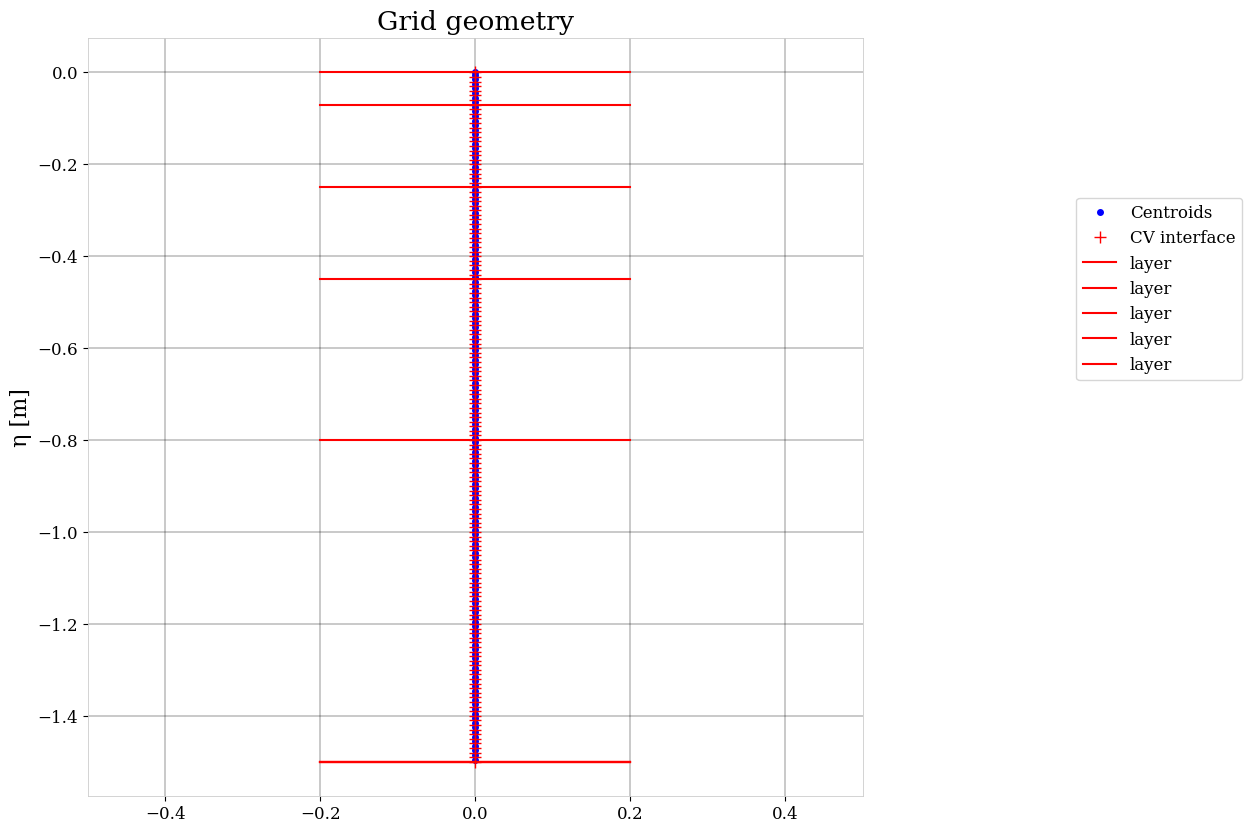

In [7]:
showMesh(data_grid)

# Condizioni iniziali

## librerie

In [8]:
import xarray as xr
import matplotlib.style as style 
style.available
style.use('seaborn-whitegrid')
nice_fonts = {
        "legend.frameon": True,"legend.fancybox": True,"legend.facecolor": "white","axes.edgecolor": "0.8","axes.linewidth": 0.6,"grid.linewidth":0.4,
        "text.usetex": False,"font.family": "serif","axes.labelsize": 16,"font.size": 16,"legend.fontsize": 14,"xtick.labelsize": 14,"ytick.labelsize": 14,}
plt.rcParams.update(nice_fonts)

In [9]:
ds = xr.open_dataset(project_path + '/data/Grid_NetCDF/ex01_grid_perissini.nc')

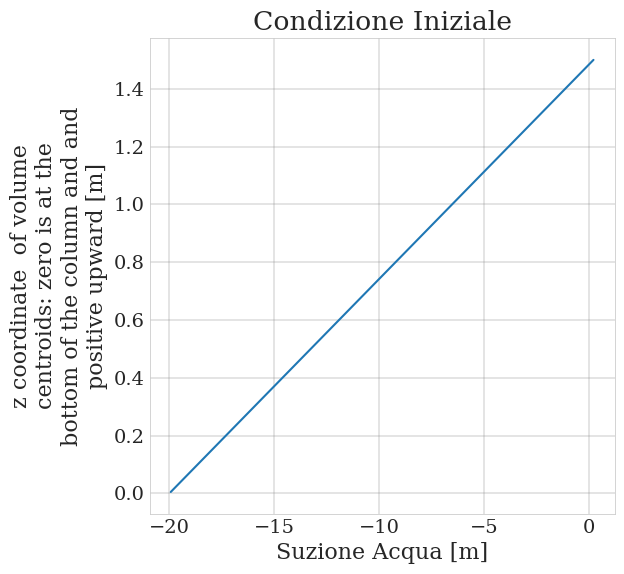

In [10]:
fig = plt.figure(figsize=(6,10/1.62))
ds.psi0.plot(y='z')
plt.xlabel('Suzione Acqua [m]')
plt.title('Condizione Iniziale')
plt.grid(color='grey', linestyle='-', linewidth=0.3)
#plt.xlim(-2.0, 7.0)